In [50]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [204]:
class ImageProportionalResizer:
    def resize(self, image, proportion=1/3):
        return cv.resize(image, (int(image.shape[1] * proportion), int(image.shape[0] * proportion)))


In [205]:
resizer = ImageProportionalResizer()
image_01_01 = resizer.resize(cv.imread('fingerprints/finger_print_01_01_C.bmp'))
image_01_02 = resizer.resize(cv.imread('fingerprints/finger_print_01_02_C.bmp'))
image_02 = resizer.resize(cv.imread('fingerprints/finger_print_06.bmp'))
image_03 = cv.imread('fingerprints/example_0.bmp')

In [206]:
print(image_01_01.shape)
print(image_01_02.shape)
print(image_02.shape)
print(image_03.shape)

(180, 126, 3)
(180, 125, 3)
(202, 136, 3)
(103, 96, 3)


In [214]:
class OrientationFieldCreator:
    def __init__(self, block_size):
        self.block_size = block_size

    def _calculate_gradients(self, image, block_size):
        b = block_size // 2
        gradient_x, gradient_y = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3), cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
        g_xx = np.zeros_like(image, dtype=float)
        g_yy = np.zeros_like(image, dtype=float)
        g_xy = np.zeros_like(image, dtype=float)
        for i in range(b, gradient_x.shape[0] - b):
            for j in range(b, gradient_x.shape[1] - b):
                window_x = gradient_x[i-b:i+b+1, j-b:j+b+1]
                window_y = gradient_y[i-b:i+b+1, j-b:j+b+1]
                g_xx[i, j] = np.sum(window_x ** 2)
                g_yy[i, j] = np.sum(window_y ** 2)
                g_xy[i, j] = np.sum(window_x * window_y)
        return g_xx, g_yy, g_xy

    def create_field_for(self, image):
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
        g_xx, g_yy, g_xy = self._calculate_gradients(gray_image, self.block_size)
        return np.rad2deg(0.5 * np.pi + 0.5 * np.arctan2(2 * g_xy, g_xx - g_yy)) % 180

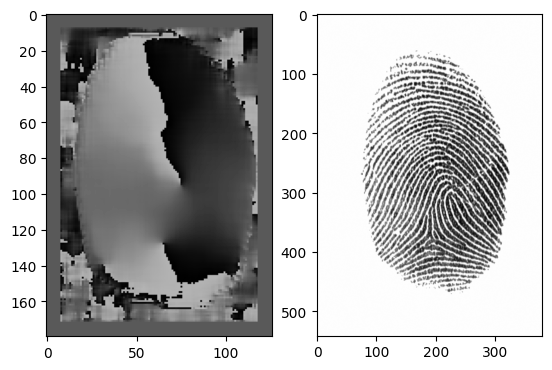

In [254]:
orientation_field_creator = OrientationFieldCreator(16)

def show(im1, im2):
    plt.subplot(1,2,1)
    plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
    cv.imwrite("ouptut.png", im1)
    plt.subplot(1,2,2)
    plt.imshow(im2)

show(orientation_field_creator.create_field_for(image_01_01), cv.imread('fingerprints/finger_print_01_01_C.bmp'))

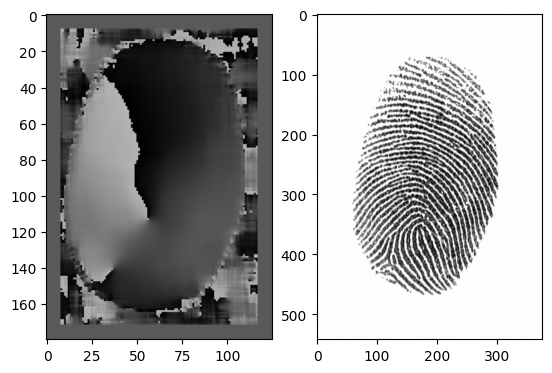

In [255]:
show(orientation_field_creator.create_field_for(image_01_02), cv.imread('fingerprints/finger_print_01_02_C.bmp'))

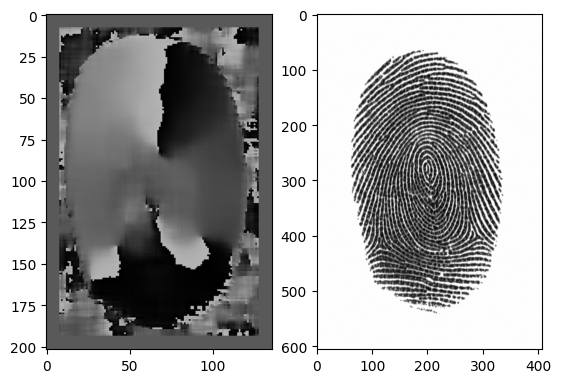

In [256]:
show(orientation_field_creator.create_field_for(image_02), cv.imread('fingerprints/finger_print_06.bmp'))

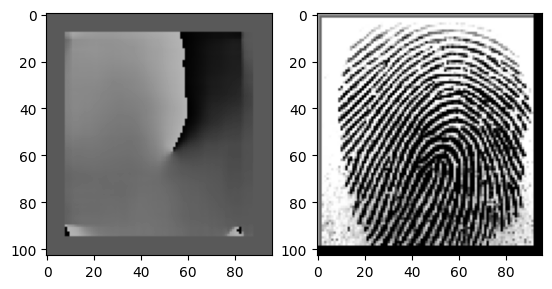

In [257]:
show(orientation_field_creator.create_field_for(image_03), cv.imread('fingerprints/example_0.bmp'))